(200, 5)


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


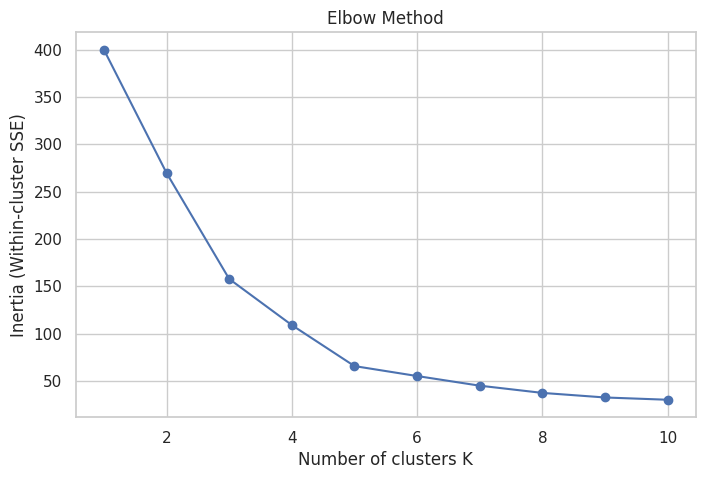

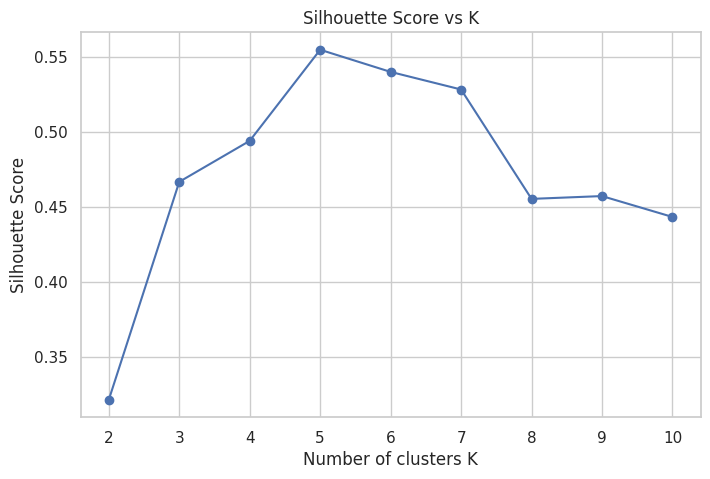

Silhouette scores: {2: np.float64(0.3212707813908991), 3: np.float64(0.46658474418951484), 4: np.float64(0.49390692375070455), 5: np.float64(0.5546571631100179), 6: np.float64(0.5398800926779752), 7: np.float64(0.5281492781097099), 8: np.float64(0.45521479065566317), 9: np.float64(0.45708539669106174), 10: np.float64(0.44317130264748655)}

Cluster counts:
cluster
0    81
1    39
3    35
4    23
2    22
Name: count, dtype: int64


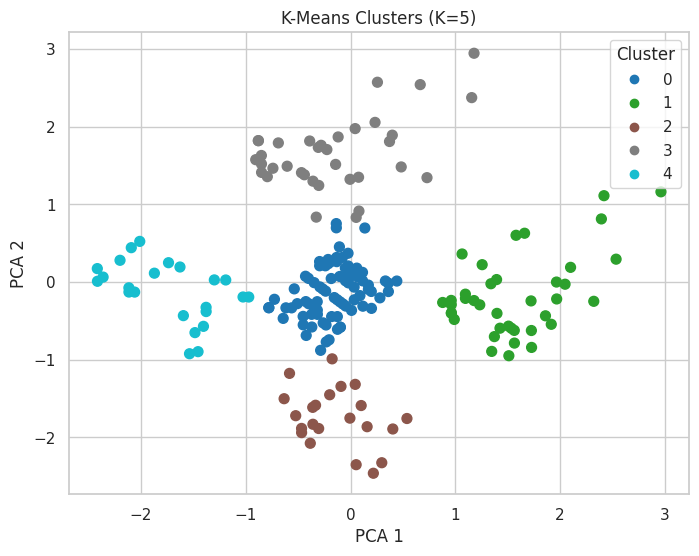


Cluster Centers in original feature space:


,Annual Income (k$),Spending Score (1-100)
0,55.296296,49.518519
1,86.538462,82.128205
2,25.727273,79.363636
3,88.200000,17.114286
4,26.304348,20.913043


Final Silhouette Score: 0.5546571631100179

Task 8 – K-Means clustering completed.


In [2]:
# -----------------------------------------
# 1. Imports
# -----------------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8, 5)

# -----------------------------------------
# 2. Load Dataset
# -----------------------------------------
df = pd.read_csv("data/Mall_Customers.csv")  # change name if different
print(df.shape)
display(df.head())
print(df.info())

# We will use Annual Income & Spending Score for clustering
features = ['Annual Income (k$)', 'Spending Score (1-100)']
X = df[features].values

# -----------------------------------------
# 3. Scaling / Normalization
# -----------------------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# -----------------------------------------
# 4. Optional PCA (not really needed with 2 features,
#    but shown for general case)
# -----------------------------------------
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# -----------------------------------------
# 5. Elbow Method to choose K
# -----------------------------------------
inertias = []
K_range = range(1, 11)

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X_pca)
    inertias.append(km.inertia_)

plt.plot(K_range, inertias, marker='o')
plt.xlabel("Number of clusters K")
plt.ylabel("Inertia (Within-cluster SSE)")
plt.title("Elbow Method")
plt.show()

# -----------------------------------------
# 6. Silhouette Score for K >= 2
# -----------------------------------------
sil_scores = []
K_range2 = range(2, 11)

for k in K_range2:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = km.fit_predict(X_pca)
    score = silhouette_score(X_pca, labels)
    sil_scores.append(score)

plt.plot(K_range2, sil_scores, marker='o')
plt.xlabel("Number of clusters K")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score vs K")
plt.show()

print("Silhouette scores:", dict(zip(K_range2, sil_scores)))

# Choose K (for Mall Customers usually K=5 works well;
# you can pick based on elbow + silhouette)
best_k = 5

# -----------------------------------------
# 7. Fit Final K-Means Model
# -----------------------------------------
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X_pca)

df['cluster'] = cluster_labels

print("\nCluster counts:")
print(df['cluster'].value_counts())

# -----------------------------------------
# 8. Visualize Clusters (2D)
# -----------------------------------------
plt.figure(figsize=(8,6))
scatter = plt.scatter(X_pca[:,0], X_pca[:,1],
                      c=cluster_labels, cmap='tab10', s=50)
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title(f"K-Means Clusters (K={best_k})")
plt.legend(*scatter.legend_elements(), title="Cluster")
plt.show()

# -----------------------------------------
# 9. Inspect Cluster Centroids (in original feature space)
# -----------------------------------------
centers_scaled = kmeans.cluster_centers_
centers_original = scaler.inverse_transform(pca.inverse_transform(centers_scaled))

centers_df = pd.DataFrame(centers_original, columns=features)
print("\nCluster Centers in original feature space:")
display(centers_df)

# -----------------------------------------
# 10. Silhouette Score for final model
# -----------------------------------------
final_silhouette = silhouette_score(X_pca, cluster_labels)
print("Final Silhouette Score:", final_silhouette)

print("\nTask 8 – K-Means clustering completed.")
